In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Churn_Modelling.csv')

In [6]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


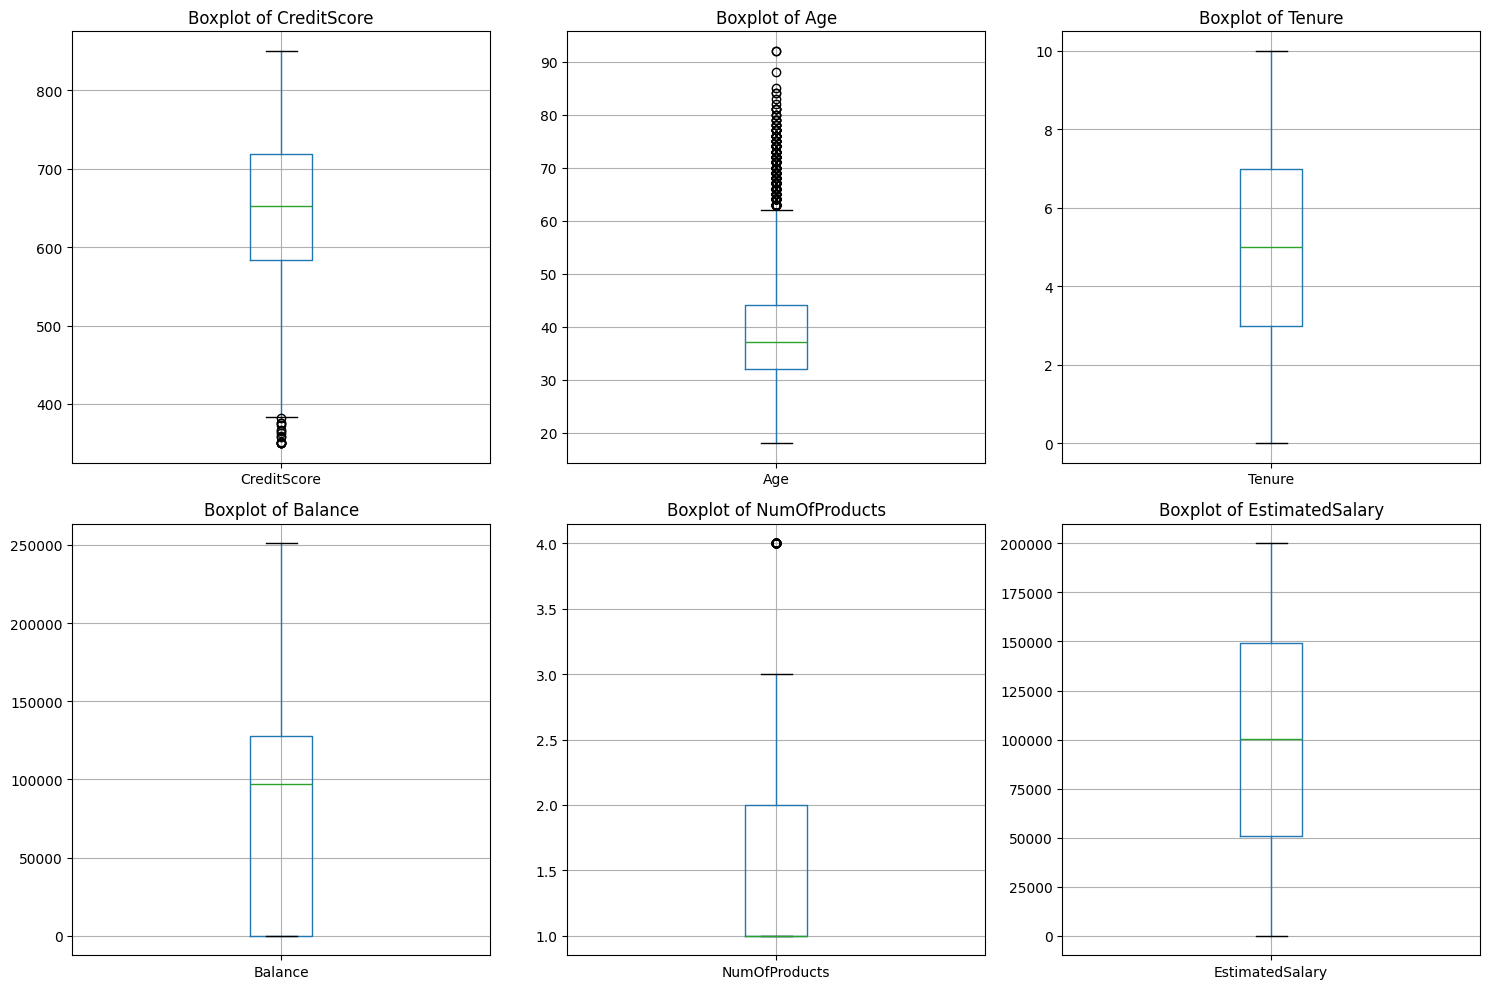

In [7]:
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']



# Create box plots for each numeric column

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):

    plt.subplot(2, 3, i)

    data.boxplot(column=column)

    plt.title(f'Boxplot of {column}')



plt.tight_layout()

plt.show()


In [8]:
def analyze_outliers(column):

    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)

    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)

    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers

    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

    anomalies = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    sorted_data = data[column].sort_values()



    return {

        "Q1": Q1,

        "Q3": Q3,

        "IQR": IQR,

        "Lower Bound": lower_bound,

        "Upper Bound": upper_bound,

        "Anomalies": anomalies.tolist(),

        "Sorted Data": sorted_data.tolist(),

    }



# Analyze outliers for all numeric columns

outlier_analysis = {column: analyze_outliers(column) for column in numeric_columns}



outlier_analysis

{'CreditScore': {'Q1': 584.0,
  'Q3': 718.0,
  'IQR': 134.0,
  'Lower Bound': 383.0,
  'Upper Bound': 919.0,
  'Anomalies': [376,
   376,
   363,
   359,
   350,
   350,
   358,
   351,
   365,
   367,
   350,
   350,
   382,
   373,
   350],
  'Sorted Data': [350,
   350,
   350,
   350,
   350,
   351,
   358,
   359,
   363,
   365,
   367,
   373,
   376,
   376,
   382,
   383,
   386,
   395,
   399,
   401,
   404,
   405,
   405,
   407,
   408,
   408,
   410,
   410,
   410,
   411,
   411,
   411,
   411,
   412,
   413,
   413,
   413,
   414,
   414,
   415,
   415,
   415,
   416,
   416,
   416,
   416,
   417,
   418,
   418,
   418,
   418,
   418,
   418,
   419,
   420,
   420,
   420,
   421,
   421,
   421,
   422,
   422,
   422,
   422,
   423,
   424,
   425,
   425,
   425,
   425,
   426,
   426,
   427,
   427,
   427,
   427,
   427,
   427,
   428,
   428,
   428,
   429,
   429,
   429,
   429,
   430,
   430,
   430,
   430,
   430,
   430,
   430,
   430

In [15]:
# Create a detailed analysis function for numeric columns
def detailed_outlier_analysis(data, columns):
    results = {}
    for column in columns:
        # Quartiles
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Detect anomalies
        anomalies = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

        # Sort the data
        sorted_data = data[column].sort_values()

        # Store results
        results[column] = {
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Anomalies": anomalies.tolist(),
            "Sorted Data": sorted_data.tolist(),
        }
    return results

# Perform analysis on all numeric columns
detailed_analysis = detailed_outlier_analysis(data, numeric_columns)

# Output the results for the first column as an example
detailed_analysis["CreditScore"]


TypeError: list indices must be integers or slices, not str

In [12]:

data = [1, 2, np.nan, 4, 5]
percentile_50 = np.nanpercentile(data, 50)
percentile_25 = np.nanpercentile(data, 25)
percentile_75 = np.nanpercentile(data, 75)

print(f"25th Percentile: {percentile_25}")
print(f"50th Percentile (Median): {percentile_50}")
print(f"75th Percentile: {percentile_75}")


25th Percentile: 1.75
50th Percentile (Median): 3.0
75th Percentile: 4.25
